# The Sparks Foundation - Data Science & Business Analytics Internship
## Author - Mayur Pokharkar
## Task-1 : " Prediction using Unsupervised Learning "
### Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Reading the dataset

In [2]:
data = pd.read_csv("Iris.csv")
print(data.head(n=10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


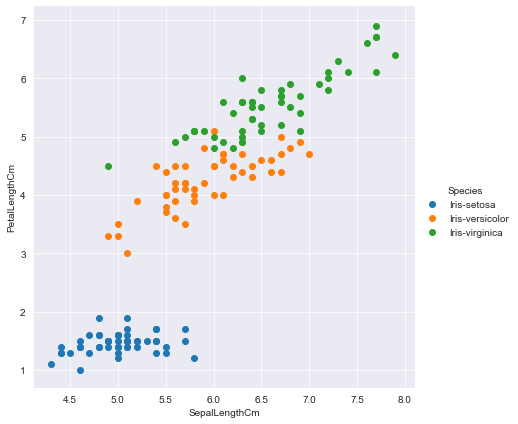

In [16]:
sns.set_style("darkgrid")
# sepal_length vs petal_length
# height used to define height of graph whereas hue store the class of iris dataset.
sns.FacetGrid(data, hue="Species", height=6).map(
    plt.scatter, 'SepalLengthCm', 'PetalLengthCm').add_legend()

In [37]:
x = data.iloc[:, [1, 2, 3, 4]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Now we need the find optimal 'k' for k-means clustering.

In [5]:
# this list will hold the values of WCSS(Within-Clusters-Sum-of-Squares)
arr = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    arr.append(kmeans.inertia_)

In [6]:
arr

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

### Visualizing 'The Elbow Method'

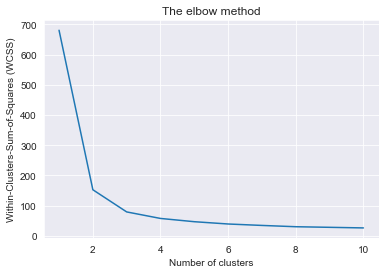

In [39]:
plt.plot(range(1, 11), arr)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Clusters-Sum-of-Squares (WCSS)')
plt.show()

#### We can clearly observe that plot here look like an arm with a clear elbow as k = 3. So we will take k as 3 for this dataset.

### Training the model

In [8]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the clusters

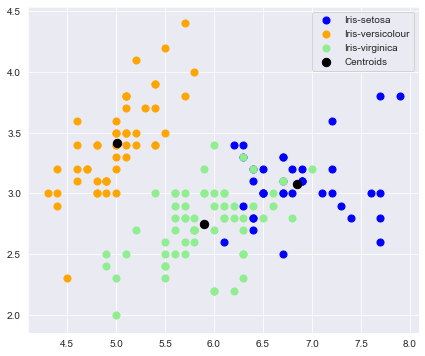

In [32]:
# first two columns
plt.figure(figsize=(7, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s=50, c='blue', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s=50, c='orange', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s=50, c='lightgreen', label='Iris-virginica')

# centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=70, c='black', label='Centroids')

plt.legend(loc="upper right", fontsize='medium')